In [18]:
# computation packages
import numpy as np
import pandas as pd
from math import *
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm


# plotting packages
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [19]:
def MAPE(actual, predicted):
    return np.mean(np.abs(actual-predicted)/actual)

In [20]:
stock =  pd.read_csv("stockPrices.csv")

In [21]:
stock.head()

,Date,AAPL,GOOG,TSLA,KO,OXY,BAC
0,2022-03-24,174.070007,141.311996,337.973328,60.980000,57.750000,43.070000
1,2022-03-25,174.720001,141.521500,336.880005,61.529999,58.709999,43.730000
2,2022-03-28,175.600006,141.949997,363.946655,61.919998,56.639999,43.549999
3,2022-03-29,178.960007,143.250000,366.523346,62.160000,56.790001,43.439999
4,2022-03-30,177.770004,142.644501,364.663330,62.209999,57.480000,43.000000


In [22]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    251 non-null    object 
 1   AAPL    251 non-null    float64
 2   GOOG    251 non-null    float64
 3   TSLA    251 non-null    float64
 4   KO      251 non-null    float64
 5   OXY     251 non-null    float64
 6   BAC     251 non-null    float64
dtypes: float64(6), object(1)
memory usage: 13.9+ KB


In [23]:
# stock['Date'] = stock['Date'].astype('datetime64[ns]')
stock['Date'] = pd.to_datetime(stock['Date'])
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    251 non-null    datetime64[ns]
 1   AAPL    251 non-null    float64       
 2   GOOG    251 non-null    float64       
 3   TSLA    251 non-null    float64       
 4   KO      251 non-null    float64       
 5   OXY     251 non-null    float64       
 6   BAC     251 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 13.9 KB


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.72847D+00    |proj g|=  5.56480D-02

At iterate    5    f=  2.70038D+00    |proj g|=  4.54879D-04

At iterate   10    f=  2.70037D+00    |proj g|=  4.63882D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     14      1     0     0   2.231D-06   2.700D+00
  F =   2.7003681535609041     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
MAPE = 24.16%


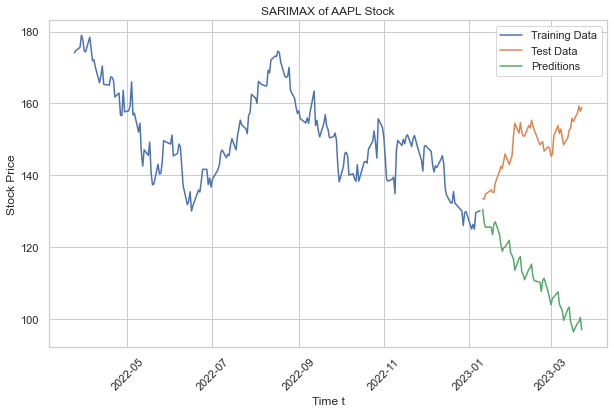

In [24]:
# Apple
train, test = pd.DataFrame(), pd.DataFrame()
train['ds'] = stock['Date'][:int(len(stock['Date'])*0.8)]
train['y'] = stock['AAPL'][:int(len(stock['AAPL'])*0.8)]
test['ds'] = stock['Date'][int(len(stock['Date'])*0.8)+1:]
test['y'] = stock['AAPL'][int(len(stock['AAPL'])*0.8)+1:]

model = SARIMAX(endog=train['y'],
                order=(1, 1, 1), 
                seasonal_order=(1, 1, 0, 12))
results = model.fit()
predictions = results.forecast(steps=len(test))

predictions.index+=1
preds_pd=predictions.to_frame(name='Value')
preds_pd['ds'] = test.ds

train = train.rename(columns = {'y': 'value'}).set_index('ds')
test = test.rename(columns = {'y': 'value'}).set_index('ds')
preds = preds_pd.rename(columns = {'y': 'value'}).set_index('ds')

plt.figure(figsize=(10,6))
plt.plot(train, label = 'Training Data')
plt.plot(test, label = 'Test Data')
plt.plot(preds, label='Preditions')
plt.xlabel('Time t')
plt.xticks(rotation= 45)
plt.ylabel('Stock Price')
plt.title('SARIMAX of AAPL Stock')
plt.legend()
print("MAPE = {:0.2%}".format(MAPE(test.value.values, predictions.values)))

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.70320D+00    |proj g|=  1.78360D-02

At iterate    5    f=  3.67238D+00    |proj g|=  6.20685D-03

At iterate   10    f=  3.65832D+00    |proj g|=  1.07816D-03

At iterate   15    f=  3.65815D+00    |proj g|=  1.09092D-03

At iterate   20    f=  3.65804D+00    |proj g|=  8.71183D-04

At iterate   25    f=  3.65802D+00    |proj g|=  2.45328D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     28     32      1     0     0   

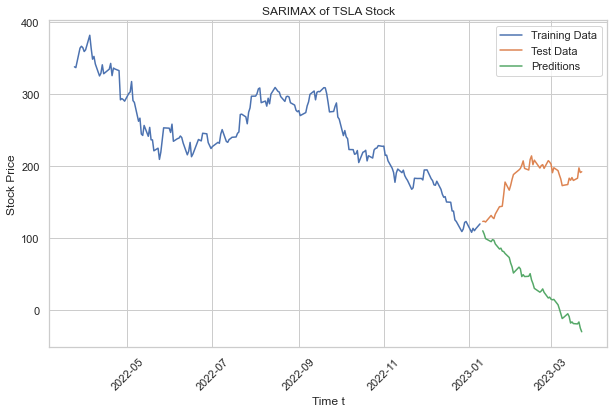

In [25]:
# TSLA
train, test = pd.DataFrame(), pd.DataFrame()
train['ds'] = stock['Date'][:int(len(stock['Date'])*0.8)]
train['y'] = stock['TSLA'][:int(len(stock['TSLA'])*0.8)]
test['ds'] = stock['Date'][int(len(stock['Date'])*0.8)+1:]
test['y'] = stock['TSLA'][int(len(stock['TSLA'])*0.8)+1:]

model = SARIMAX(endog=train['y'],
                order=(1, 1, 1), 
                seasonal_order=(1, 1, 0, 12))
results = model.fit()
predictions = results.forecast(steps=len(test))
predictions.index+=1
preds_pd=predictions.to_frame(name='Value')
preds_pd['ds'] = test.ds
train = train.rename(columns = {'y': 'value'}).set_index('ds')
test = test.rename(columns = {'y': 'value'}).set_index('ds')
preds = preds_pd.rename(columns = {'y': 'value'}).set_index('ds')

plt.figure(figsize=(10,6))
plt.plot(train, label = 'Training Data')
plt.plot(test, label = 'Test Data')
plt.plot(preds, label='Preditions')
plt.xlabel('Time t')
plt.xticks(rotation= 45)
plt.ylabel('Stock Price')
plt.title('SARIMAX of TSLA Stock')
plt.legend()
print("MAPE = {:0.2%}".format(MAPE(test.value.values, predictions.values)))

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.33309D+00    |proj g|=  2.36037D-01

At iterate    5    f=  1.30474D+00    |proj g|=  6.92343D-04

At iterate   10    f=  1.30472D+00    |proj g|=  1.53190D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     18      1     0     0   1.794D-06   1.305D+00
  F =   1.3047210498514936     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


MAPE = 2.00%


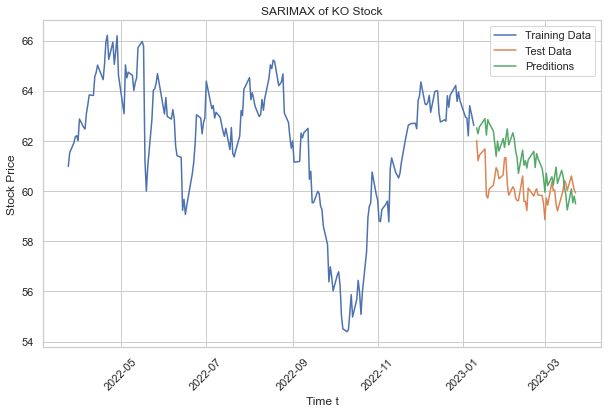

In [26]:
# KO
train, test = pd.DataFrame(), pd.DataFrame()
train['ds'] = stock['Date'][:int(len(stock['Date'])*0.8)]
train['y'] = stock['KO'][:int(len(stock['KO'])*0.8)]
test['ds'] = stock['Date'][int(len(stock['Date'])*0.8)+1:]
test['y'] = stock['KO'][int(len(stock['KO'])*0.8)+1:]

model = SARIMAX(endog=train['y'],
                order=(1, 1, 1), 
                seasonal_order=(1, 1, 0, 12))
results = model.fit()
predictions = results.forecast(steps=len(test))
predictions.index+=1
preds_pd=predictions.to_frame(name='Value')
preds_pd['ds'] = test.ds
train = train.rename(columns = {'y': 'value'}).set_index('ds')
test = test.rename(columns = {'y': 'value'}).set_index('ds')
preds = preds_pd.rename(columns = {'y': 'value'}).set_index('ds')

plt.figure(figsize=(10,6))
plt.plot(train, label = 'Training Data')
plt.plot(test, label = 'Test Data')
plt.plot(preds, label='Preditions')
plt.xlabel('Time t')
plt.xticks(rotation= 45)
plt.ylabel('Stock Price')
plt.title('SARIMAX of KO Stock')
plt.legend()
print("MAPE = {:0.2%}".format(MAPE(test.value.values, predictions.values)))

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.19884D+00    |proj g|=  6.78100D-02

At iterate    5    f=  2.18761D+00    |proj g|=  2.95571D-04


 This problem is unconstrained.



At iterate   10    f=  2.18733D+00    |proj g|=  4.04278D-02

At iterate   15    f=  2.18346D+00    |proj g|=  1.47469D-02

At iterate   20    f=  2.18276D+00    |proj g|=  3.84267D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     31      1     0     0   2.695D-06   2.183D+00
  F =   2.1827569830481361     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
MAPE = 3.07%


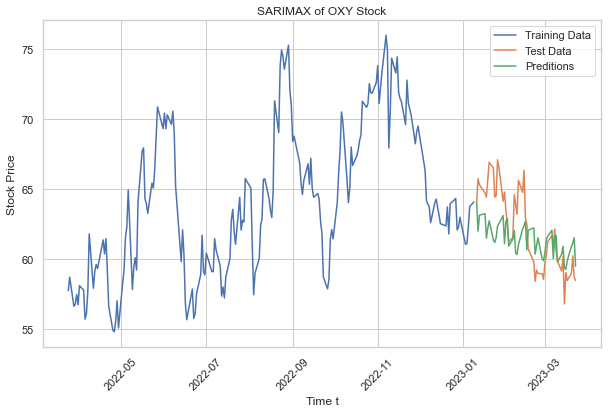

In [27]:
# OXY
train, test = pd.DataFrame(), pd.DataFrame()
train['ds'] = stock['Date'][:int(len(stock['Date'])*0.8)]
train['y'] = stock['OXY'][:int(len(stock['OXY'])*0.8)]
test['ds'] = stock['Date'][int(len(stock['Date'])*0.8)+1:]
test['y'] = stock['OXY'][int(len(stock['OXY'])*0.8)+1:]

model = SARIMAX(endog=train['y'],
                order=(1, 1, 1), 
                seasonal_order=(1, 1, 0, 12))
results = model.fit()
predictions = results.forecast(steps=len(test))
predictions.index+=1
preds_pd=predictions.to_frame(name='Value')
preds_pd['ds'] = test.ds
train = train.rename(columns = {'y': 'value'}).set_index('ds')
test = test.rename(columns = {'y': 'value'}).set_index('ds')
preds = preds_pd.rename(columns = {'y': 'value'}).set_index('ds')

plt.figure(figsize=(10,6))
plt.plot(train, label = 'Training Data')
plt.plot(test, label = 'Test Data')
plt.plot(preds, label='Preditions')
plt.xlabel('Time t')
plt.xticks(rotation= 45)
plt.ylabel('Stock Price')
plt.title('SARIMAX of OXY Stock')
plt.legend()
print("MAPE = {:0.2%}".format(MAPE(test.value.values, predictions.values)))

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23248D+00    |proj g|=  2.89001D-01

At iterate    5    f=  1.19993D+00    |proj g|=  1.59227D-02

At iterate   10    f=  1.19664D+00    |proj g|=  3.68323D-03


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     17      1     0     0   3.401D-06   1.197D+00
  F =   1.1966333337256689     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
MAPE = 8.47%


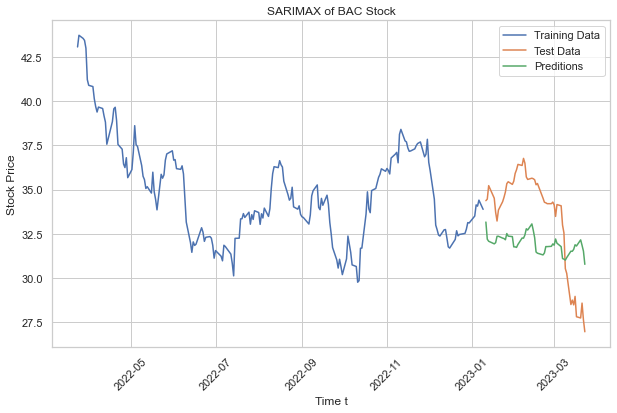

In [28]:
# BAC
train, test = pd.DataFrame(), pd.DataFrame()
train['ds'] = stock['Date'][:int(len(stock['Date'])*0.8)]
train['y'] = stock['BAC'][:int(len(stock['BAC'])*0.8)]
test['ds'] = stock['Date'][int(len(stock['Date'])*0.8)+1:]
test['y'] = stock['BAC'][int(len(stock['BAC'])*0.8)+1:]

model = SARIMAX(endog=train['y'],
                order=(1, 1, 1), 
                seasonal_order=(1, 1, 0, 12))
results = model.fit()
predictions = results.forecast(steps=len(test))
predictions.index+=1
preds_pd=predictions.to_frame(name='Value')
preds_pd['ds'] = test.ds
train = train.rename(columns = {'y': 'value'}).set_index('ds')
test = test.rename(columns = {'y': 'value'}).set_index('ds')
preds = preds_pd.rename(columns = {'y': 'value'}).set_index('ds')

plt.figure(figsize=(10,6))
plt.plot(train, label = 'Training Data')
plt.plot(test, label = 'Test Data')
plt.plot(preds, label='Preditions')
plt.xlabel('Time t')
plt.xticks(rotation= 45)
plt.ylabel('Stock Price')
plt.title('SARIMAX of BAC Stock')
plt.legend()
print("MAPE = {:0.2%}".format(MAPE(test.value.values, predictions.values)))